In [35]:
import pandas as pd
import matplotlib as plt

import ast
import random
from sklearn.model_selection import train_test_split

In [53]:
data_all = pd.read_csv("../../data/ref_3_note_200_test.csv")
# data_all['label'] = data_all['label'].str.replace('.wav', '').str.split('_')
# data_all.to_csv("../../data/ref_3_note_1000sample_tolerance_15.csv", index=False)
# แปลงคอลัมน์ 'label' ให้เป็น list of list
data_all['label'] = data_all['label'].apply(ast.literal_eval)

In [46]:
# กรองข้อมูลเฉพาะที่มีความยาว 3
data_3_note = data_all[data_all['label'].apply(len) == 3]
data_4_note = data_all[data_all['label'].apply(len) == 4]
data_5_note = data_all[data_all['label'].apply(len) == 5]
data_6_note = data_all[data_all['label'].apply(len) == 6]
data_7_note = data_all[data_all['label'].apply(len) == 7]
data_8_note = data_all[data_all['label'].apply(len) == 8]
data_9_note = data_all[data_all['label'].apply(len) == 9]
data_10_note = data_all[data_all['label'].apply(len) == 10]


3
2
4


<Axes: >

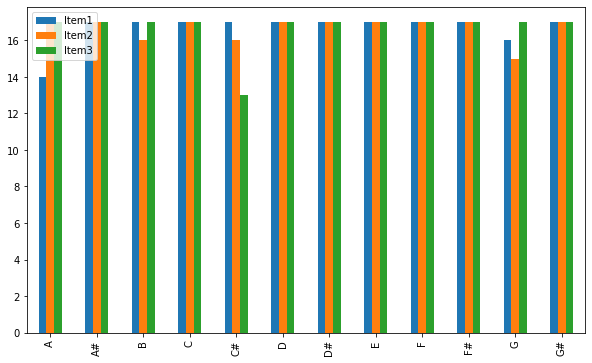

In [54]:
# data_all['label'] = data_all['label'].str.replace('.wav', '').str.split('_')
# y_train_check = pd.DataFrame(data_3_note["label"].apply(ast.literal_eval).tolist(), index=data_3_note.index, columns=['note1', 'note2', 'note3'])
y_train_check = pd.DataFrame(data_all["label"].tolist(), index=data_all.index, columns=['note1', 'note2', 'note3'])

# Count the frequency of each item in 'note1', 'note2', 'note3'
freq_item1 = y_train_check['note1'].value_counts()
freq_item2 = y_train_check['note2'].value_counts()
freq_item3 = y_train_check['note3'].value_counts()

print(max(freq_item1) - min(freq_item1))
print(max(freq_item2) - min(freq_item2))
print(max(freq_item3) - min(freq_item3))

# Create a DataFrame for the frequency data
freq_df = pd.DataFrame({'Item1': freq_item1, 'Item2': freq_item2, 'Item3': freq_item3}).fillna(0)

# Plot a bar chart
freq_df.plot(kind='bar', figsize=(10, 6))

In [613]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,File Name,label
263,wav_GBC7110.wav,"[7,11,0]"
72,wav_AC#A919.wav,"[9,1,9]"
834,wav_BAB11911.wav,"[11,9,11]"
101,wav_EbFBb3510.wav,"[3,5,10]"
729,wav_EDF425.wav,"[4,2,5]"
...,...,...
670,wav_AGE974.wav,"[9,7,4]"
507,wav_BEEb1143.wav,"[11,4,3]"
471,wav_BbDC1020.wav,"[10,2,0]"
406,wav_AbCE804.wav,"[8,0,4]"


In [26]:
data_val_test = pd.read_csv('../../data/ref_3_note_val_test.csv')

<Axes: >

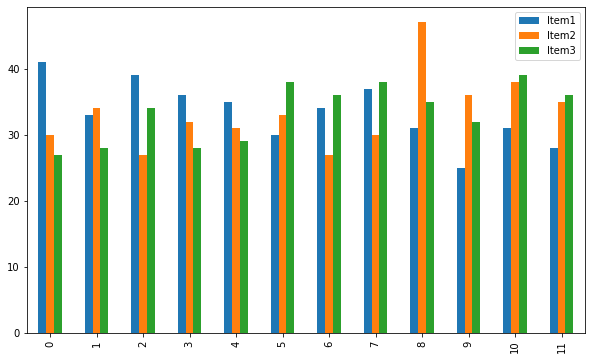

In [28]:
y_train_check = pd.DataFrame(data_val_test['label'].apply(ast.literal_eval).tolist(), index=data_val_test['label'].index, columns=['note1', 'note2', 'note3'])

# Count the frequency of each item in 'note1', 'note2', 'note3'
freq_item1 = y_train_check['note1'].value_counts()
freq_item2 = y_train_check['note2'].value_counts()
freq_item3 = y_train_check['note3'].value_counts()
dif_1 = max(freq_item1) - min(freq_item1)
dif_2 = max(freq_item2) - min(freq_item2)
dif_3 = max(freq_item3) - min(freq_item3)

# Create a DataFrame for the frequency data
freq_df = pd.DataFrame({'Item1': freq_item1, 'Item2': freq_item2, 'Item3': freq_item3}).fillna(0)

# Plot a bar chart
freq_df.plot(kind='bar', figsize=(10, 6))

1000
12
25
8


<Axes: >

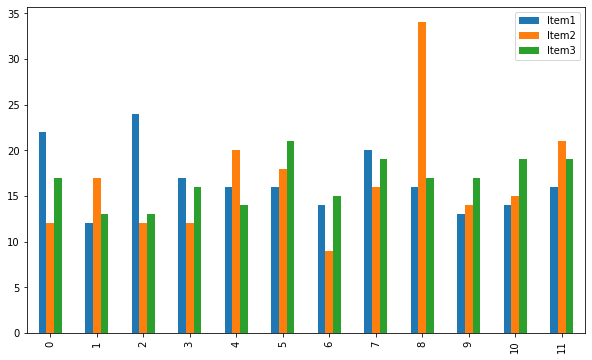

In [25]:
dif_1, dif_2, dif_3 =50, 50, 50
num_round = 0
while (dif_1 > 7 or dif_2 > 7 or dif_3 > 7) and num_round < 1000:
    X_test, X_val, y_test, y_val = train_test_split(data_val_test['File Name'], data_val_test['label'], test_size=0.5)
    # Since 'label' appears to be a string representation of a list/tuple, evaluate it
    y_train_check = pd.DataFrame(y_test.apply(ast.literal_eval).tolist(), index=y_test.index, columns=['note1', 'note2', 'note3'])

    # Count the frequency of each item in 'note1', 'note2', 'note3'
    freq_item1 = y_train_check['note1'].value_counts()
    freq_item2 = y_train_check['note2'].value_counts()
    freq_item3 = y_train_check['note3'].value_counts()
    dif_1 = max(freq_item1) - min(freq_item1)
    dif_2 = max(freq_item2) - min(freq_item2)
    dif_3 = max(freq_item3) - min(freq_item3)
    num_round += 1

print(num_round)
print(dif_1)
print(dif_2)
print(dif_3)

train_data = pd.concat([X_test, y_test], axis=1)
val_test_data = pd.concat([X_val, y_val], axis=1)
train_data.to_csv("../../data/ref_3_note_validate2.csv", index=False)
val_test_data.to_csv("../../data/ref_3_note_test2.csv", index=False)


# Create a DataFrame for the frequency data
freq_df = pd.DataFrame({'Item1': freq_item1, 'Item2': freq_item2, 'Item3': freq_item3}).fillna(0)

# Plot a bar chart
freq_df.plot(kind='bar', figsize=(10, 6))